## Notebook Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot

%matplotlib inline 

In [58]:
ipl_data = pd.read_csv('IPL2013.csv')
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [59]:
ipl_data.shape

(130, 26)

In [60]:
ipl_data.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [61]:
#selecting only main features
ipl_main = ipl_data.drop(['Sl.NO.','PLAYER NAME','TEAM','AUCTION YEAR','BASE PRICE'],axis=1)
ipl_main.head()

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
0,2,SA,Allrounder,0,0,0,0.00,0,0.0,0,...,0,0.00,0.00,0,307,15,20.47,8.90,13.93,50000
1,2,BAN,Bowler,214,18,657,71.41,185,37.6,0,...,0,0.00,0.00,0,29,0,0.00,14.50,0.00,50000
2,2,IND,Bowler,571,58,1269,80.62,288,32.9,0,...,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,350000
3,1,IND,Bowler,284,31,241,84.56,51,36.8,0,...,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,850000
4,2,IND,Batsman,63,0,79,45.93,0,0.0,0,...,71,32.93,120.71,28,0,0,0.00,0.00,0.00,800000


In [62]:
#categorical data for above dataframe
categorical_features = ['AGE' , 'COUNTRY' , 'PLAYING ROLE' , 'CAPTAINCY EXP']

In [63]:
#using get dummies to split categorical data
ipl_main_encoded = pd.get_dummies(data=ipl_main ,columns=categorical_features , drop_first=True )
ipl_main_encoded.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0


In [64]:
X = ipl_main_encoded.drop(['SOLD PRICE'],axis = 1)
Y = ipl_main_encoded['SOLD PRICE']

### Splitting the Dataset into train and test

In [65]:
X_1 = sm.add_constant(X)
X_train , X_test , y_train , y_test = train_test_split(X_1 , Y, train_size = .8 , random_state = 42)

### Building the model using OLS method

In [66]:
model_1 = sm.OLS(y_train,X_train).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2020-08-13 18:39        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

### Checking multicollinearity(VIF)

In [67]:
vif =[]
for i in range (X_1.shape[1]):
    vif.append(variance_inflation_factor(exog= X_1.values, exog_idx= i))
    
vif_df = pd.DataFrame({'column':X_train.columns , 'vif':vif})    

In [68]:
vif_df

,column,vif
0,const,49.613257
1,T-RUNS,8.809805
2,T-WKTS,6.393221
3,ODI-RUNS-S,11.011646
4,ODI-SR-B,1.673538
5,ODI-WKTS,6.979662
6,ODI-SR-BL,1.705721
7,RUNS-S,9.682279
8,HS,8.476796
9,AVE,6.651952


In [69]:
columns_with_high_vif = vif_df[vif_df.vif>4].column
columns_with_high_vif

0          const
1         T-RUNS
2         T-WKTS
3     ODI-RUNS-S
5       ODI-WKTS
7         RUNS-S
8             HS
9            AVE
11        SIXERS
12        RUNS-C
13          WKTS
14        AVE-BL
16         SR-BL
Name: column, dtype: object

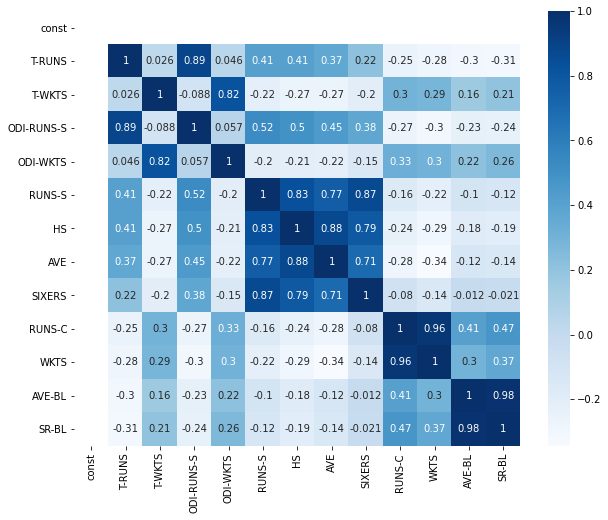

In [71]:
plt.figure(figsize=(10,8))
sn.heatmap(X_1[columns_with_high_vif].corr() , annot=True , cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Features to be removed due to high co-relation
remove_features = ['T-RUNS', 'T-WKTS','RUNS-S', 'HS', 'AVE','RUNS-C', 'SR-B', 
                   'AVE-BL','ODI-SR-B','ODI-RUNS-S','ECON', 'SR-BL', 'AGE_2']

**MODEL 2**


**Building Model 2**

In [98]:
X_train_2 = X_train.drop(remove_features,axis=1)

In [99]:
model_2 = sm.OLS(y_train,X_train_2).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.306     
Dependent Variable:        SOLD PRICE              AIC:                       2965.1884 
Date:                      2020-08-13 18:48        BIC:                       3015.4318 
No. Observations:          104                     Log-Likelihood:            -1463.6   
Df Model:                  18                      F-statistic:               3.528     
Df Residuals:              85                      Prob (F-statistic):        4.30e-05  
R-squared:                 0.428                   Scale:                     1.1990e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   165018.2667 131136.4610  1.2584 0.2117  -95716.1501  425752.6836
ODI-WKTS                   734.1123    470.0331  1.5618 0.1220    -200.4395    1668.6640
ODI-SR-BL                  170.3522   1392.9386  0.1223 0.9030   -2599.1829    2939.8873
SIXERS                    7307.8965   2125.6957  3.4379 0.0009    3081.4440   11534.3490
WKTS                      1884.7059   2142.8312  0.8795 0.3816   -2375.8166    6145.2283
AGE_3                   -42449.0085 101272.3502 -0.4192 0.6762 -243805.5722  158907.5552
COUNTRY_BAN            -191407.4393 373842.5107 -0.5120 0.6100 -934706.5057  551891.6272
COUNTRY_ENG             583513.6319 229452.7234  2.5431 0.0128  127300.1459 1039727.1180
COUNTRY_IND             222389.6877 107222.7169  2.0741 0.0411    9202.2008  435577.1746
COUNTRY_NZ               53596.1153 167166.8285  0.3206 0.7493 -278776.3249  385968.5556
COUNTRY_PAK              32828.5971 174395.9067  0.1882 0.8511 -313917.1874  379574.3815
COUNTRY_SA               20920.3202 134264.9930  0.1558 0.8765 -246034.4565  287875.0968
COUNTRY_SL              -15518.2591 152736.9322 -0.1016 0.9193 -319200.1997  288163.6815
COUNTRY_WI             -109502.5138 223369.7286 -0.4902 0.6252 -553621.3766  334616.3490
COUNTRY_ZIM            -133932.3067 393050.9282 -0.3408 0.7341 -915422.8532  647558.2398
PLAYING ROLE_Batsman     48413.3640 121109.2299  0.3997 0.6903 -192384.2311  289210.9590
PLAYING ROLE_Bowler     -65826.8428 112220.2651 -0.5866 0.5590 -288950.7945  157297.1089
PLAYING ROLE_W. Keeper -138290.1304 181788.9771 -0.7607 0.4489 -499735.3194  223155.0586
CAPTAINCY EXP_1         223581.1522  98540.3915  2.2689 0.0258   27656.4541  419505.8502
----------------------------------------------------------------------------------------
Omnibus:                     10.464               Durbin-Watson:                  2.331 
Prob(Omnibus):               0.005                Jarque-Bera (JB):               10.537
Skew:                        0.710                Prob(JB):                       0.005 
Kurtosis:                    3.643                Condition No.:                  1553  
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [100]:
vif =[]
for i in range (X_train_2.shape[1]):
    vif.append(variance_inflation_factor(exog= X_train_2.values, exog_idx= i))
    
vif_df = pd.DataFrame({'column':X_train_2.columns , 'vif':vif}) 
vif_df

,column,vif
0,const,14.916586
1,ODI-WKTS,1.948349
2,ODI-SR-BL,1.320901
3,SIXERS,1.818704
4,WKTS,1.865525
5,AGE_3,1.532324
6,COUNTRY_BAN,1.154438
7,COUNTRY_ENG,1.279337
8,COUNTRY_IND,2.418398
9,COUNTRY_NZ,1.317751


In [101]:
p_sign_values = pd.DataFrame ({'p_values':model_2.pvalues})
p_sign_values

,p_values
const,0.211703
ODI-WKTS,0.122043
ODI-SR-BL,0.902952
SIXERS,0.000910
WKTS,0.381588
AGE_3,0.676159
COUNTRY_BAN,0.609979
COUNTRY_ENG,0.012799
COUNTRY_IND,0.041097
COUNTRY_NZ,0.749289


In [102]:
sign_features = p_sign_values[p_sign_values.p_values<0.05].index
sign_features

Index(['SIXERS', 'COUNTRY_ENG', 'COUNTRY_IND', 'CAPTAINCY EXP_1'], dtype='object')

**Building Model3**

In [103]:
X_train_3 = X_train[sign_features]
model_3 = sm.OLS(y_train , X_train_3).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2020-08-13 18:50 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

### Residuals analysis

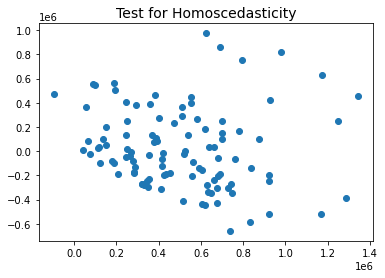

In [94]:
plt.figure(figsize=(6,4))
plt.title('Test for Homoscedasticity' , fontsize = 14)
plt.scatter(model_3.fittedvalues , model_3.resid)
plt.show()

### Detecting Influencers

In [104]:
k = X_train_3.shape[1]
n = X_train_3.shape[0]

leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.14423076923076925

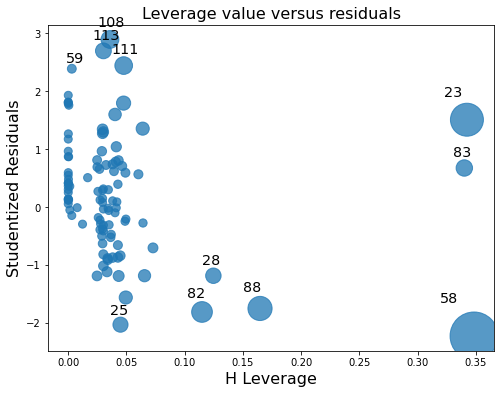

In [105]:
fig,ax=plt.subplots(figsize=(8,6))
influence_plot(model_3 , ax=ax)
plt.title('Leverage value versus residuals', fontsize = 16)
plt.show()

In [81]:
ipl_data[ipl_data.index.isin([23,83,58])]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


### Testing the model

In [106]:
predict = model_3.predict(X_test[sign_features])

In [107]:
mse = mean_squared_error(y_test,predict)
mse

111351295049.15437

In [108]:
rmse = np.sqrt(mse)
rmse

333693.4147524556

In [109]:
r_square = r2_score(y_test , predict)
r_square

0.1824765087892657